In [1]:
from sklearn.linear_model import LogisticRegression
import evaluation
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import time
import matplotlib.pyplot as plt
from statistics import mean
from sklearn.feature_selection import RFE

#### Retrieve Stored Variables
Standard and Factorized Datasets

In [2]:
%store -r data

#### Variable That Removes Class Variable and ID from Dataset

In [3]:
clean = list(set(list(data)) - set(['default_payment_next_month', 'id']))

#### Seperate Dataset into raining and Testing Subsets

In [4]:
std_x_train, std_x_test, std_y_train, std_y_test = train_test_split(data[clean], 
                                                                    data['default_payment_next_month'], 
                                                                    test_size=0.3, 
                                                                    random_state=14)

#### Instantiate Logistic Regression Model Object

In [5]:
model = LogisticRegression(solver='liblinear', random_state=34)

#### Train Model on Training Data and Use it to Predict Y Values of Test Dataset
Include Time Taken

In [6]:
start = time.time()
model.fit(X = std_x_train,
          y = std_y_train)
results = confusion_matrix(y_pred = model.predict(std_x_test),
                           y_true = std_y_test)
end = time.time()
print(f'The model took {round(end - start, 2)} seconds to train and predict.')

The model took 1.31 seconds to train and predict.


#### Display Confusion Matrix

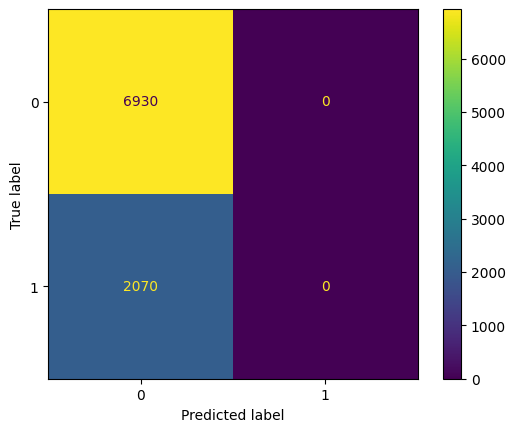

In [7]:
ConfusionMatrixDisplay(results).plot()

#### Evaluate Model Using Custom Eval Metrics Class

In [8]:
metrics = evaluation.evalMetrics(results)

In [9]:
print(f'The Accuracy of the Model: {round(metrics.accuracy(),3)}')
print(f'The Precision of the Model: {round(metrics.precision(),2)}')
print(f'The Recall of the Model: {round(metrics.recall(),2)}')
print(f'The F-Score of the Model: {round(metrics.fScore(),2)}')
print(f'The Negative Predictive Value  of the Model: {round(metrics.negativePredictiveValue(),2)}')
print(f'The Positive Predicitive Value of the Model: {round(metrics.positivePredictiveValue(),2)}')

The Accuracy of the Model: 0.77
The Precision of the Model: 0.77
The Recall of the Model: 1.0
The F-Score of the Model: 0.87
The Negative Predictive Value  of the Model: nan
The Positive Predicitive Value of the Model: 0.77


C:\Users\mitch\OneDrive\Documents\Graduate Certificate\CIND 820 - Capstone\evaluation.py:30: RuntimeWarning: invalid value encountered in scalar divide
  return self.tn / (self.tn + self.fn)


#### Cross Validate the Model using Accuracy

In [10]:
start = time.time()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=28)
cv_scores = cross_val_score(model, data[clean], data['default_payment_next_month'], scoring='accuracy', cv=cv)
end = time.time()

#### CV Scores, Min and Max

In [11]:
print(cv_scores)
print()
print('Max Cross Validation Score: ', max(cv_scores))
print('Min Cross Validation Score: ', min(cv_scores))

[0.78066667 0.78966667 0.77833333 0.77266667 0.79433333 0.77333333
 0.774      0.77766667 0.77866667 0.76733333 0.77833333 0.778
 0.79966667 0.78733333 0.78433333 0.76933333 0.769      0.77033333
 0.777      0.774      0.77466667 0.77466667 0.79066667 0.77266667
 0.78333333 0.771      0.78633333 0.78233333 0.77066667 0.781     ]

Max Cross Validation Score:  0.7996666666666666
Min Cross Validation Score:  0.7673333333333333


#### Evaluate Results of Cross Validation

In [12]:
print(f'Cross Validation took {round(end - start, 2)} seconds and produced an average accuracy of {round(mean(cv_scores),3)}')

Cross Validation took 46.56 seconds and produced an average accuracy of 0.779


#### Use Recursive Feature Elimination to Build a Streamlined Model

In [13]:
rfe = RFE(model, step = 5)
rfe.fit(X = std_x_train,
            y = std_y_train)
selected_features = [i[0] for i in list(zip(data.columns, rfe.support_)) if i[1]]

In [14]:
selected_features

['limit_bal',
 'sex',
 'age',
 'pay_0',
 'pay_5',
 'bill_amt3',
 'bill_amt5',
 'bill_amt6',
 'pay_amt1',
 'pay_amt4',
 'pay_amt5']

#### Retrain Model on Selected Features and Evaluate Change in Performance

In [15]:
features_x_train, features_x_test, features_y_train, features_y_test = train_test_split(data[selected_features], 
                                                                    data['default_payment_next_month'], 
                                                                    test_size=0.3, 
                                                                    random_state=14)

#### Reinstantiate Model nad Fit/Predict

In [16]:
model = LogisticRegression(solver='liblinear', random_state=34)

In [17]:
start = time.time()
model.fit(X = features_x_train,
          y = features_y_train)
results = confusion_matrix(y_pred = model.predict(features_x_test),
                           y_true = features_y_test)
end = time.time()
print(f'The model took {round(end - start, 2)} seconds to train and predict.')

The model took 0.24 seconds to train and predict.


#### Display CF

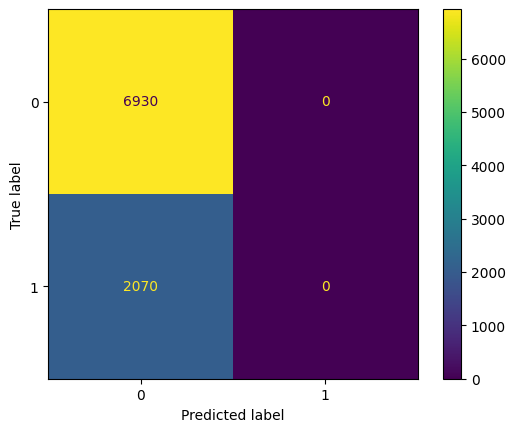

In [18]:
ConfusionMatrixDisplay(results).plot()

#### Evaluate and Cross-Validate

In [19]:
metrics = evaluation.evalMetrics(results)
print(f'The Accuracy of the Model: {round(metrics.accuracy(),3)}')
print(f'The Precision of the Model: {round(metrics.precision(),2)}')
print(f'The Recall of the Model: {round(metrics.recall(),2)}')
print(f'The F-Score of the Model: {round(metrics.fScore(),2)}')
print(f'The Negative Predictive Value  of the Model: {round(metrics.negativePredictiveValue(),2)}')
print(f'The Positive Predicitive Value of the Model: {round(metrics.positivePredictiveValue(),2)}')

The Accuracy of the Model: 0.77
The Precision of the Model: 0.77
The Recall of the Model: 1.0
The F-Score of the Model: 0.87
The Negative Predictive Value  of the Model: nan
The Positive Predicitive Value of the Model: 0.77


C:\Users\mitch\OneDrive\Documents\Graduate Certificate\CIND 820 - Capstone\evaluation.py:30: RuntimeWarning: invalid value encountered in scalar divide
  return self.tn / (self.tn + self.fn)


In [20]:
start = time.time()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=28)
cv_scores = cross_val_score(model, data[selected_features], data['default_payment_next_month'], scoring='accuracy', cv=cv)
end = time.time()
print(f'Cross Validation took {round(end - start, 2)} seconds and produced an average accuracy of {round(mean(cv_scores),3)}')

Cross Validation took 8.48 seconds and produced an average accuracy of 0.779


#### CV Scores, Min and Max

In [21]:
print(cv_scores)
print()
print('Max Cross Validation Score: ', max(cv_scores))
print('Min Cross Validation Score: ', min(cv_scores))

[0.78066667 0.78966667 0.77833333 0.77266667 0.79466667 0.77366667
 0.774      0.778      0.779      0.76733333 0.77833333 0.778
 0.79966667 0.78766667 0.78433333 0.76966667 0.769      0.77033333
 0.777      0.774      0.77466667 0.775      0.79066667 0.77266667
 0.78366667 0.771      0.78633333 0.78233333 0.77066667 0.781     ]

Max Cross Validation Score:  0.7996666666666666
Min Cross Validation Score:  0.7673333333333333
